# Business Case: Yulu - HypothesisTesting

About-
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. StarƟng off as a mission to eliminate traffic congesƟon in India, Yulu provides the safest
commute soluƟon through a user-friendly mobile app to enable shared, solo and sustainable
commuƟng.
Yulu zones are located at all the appropriate locaƟons (including metro staƟons, bus stands, office
spaces, residenƟal areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulƟng
company to understand the factors on which the demand for these shared electric cycles depends.
Specifically, they want to understand the factors affecƟng the demand for these shared electric cycles
in the Indian market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import binom,geom
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import levene,kruskal

In [2]:
df=pd.read_csv("D:\SCALER_CLASSES\TESTING(Mod-7)\Case Study\yuluData.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# no of rows amd columns in dataset
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [7]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [8]:
#New Schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [9]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [10]:
# detecting missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

1.There are no missing values in the dataset.

2.casual and registered attributes might have outliers because their mean and median are
very far away to one another and the value of standard deviation is also high which tells
us that there is high variance in the data of these attributes.

In [11]:
# minimum datetime and maximum datetime
print(df['datetime'].min(), df['datetime'].max())

2011-01-01 00:00:00 2012-12-19 23:00:00


In [12]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

# Univariate Analysis:

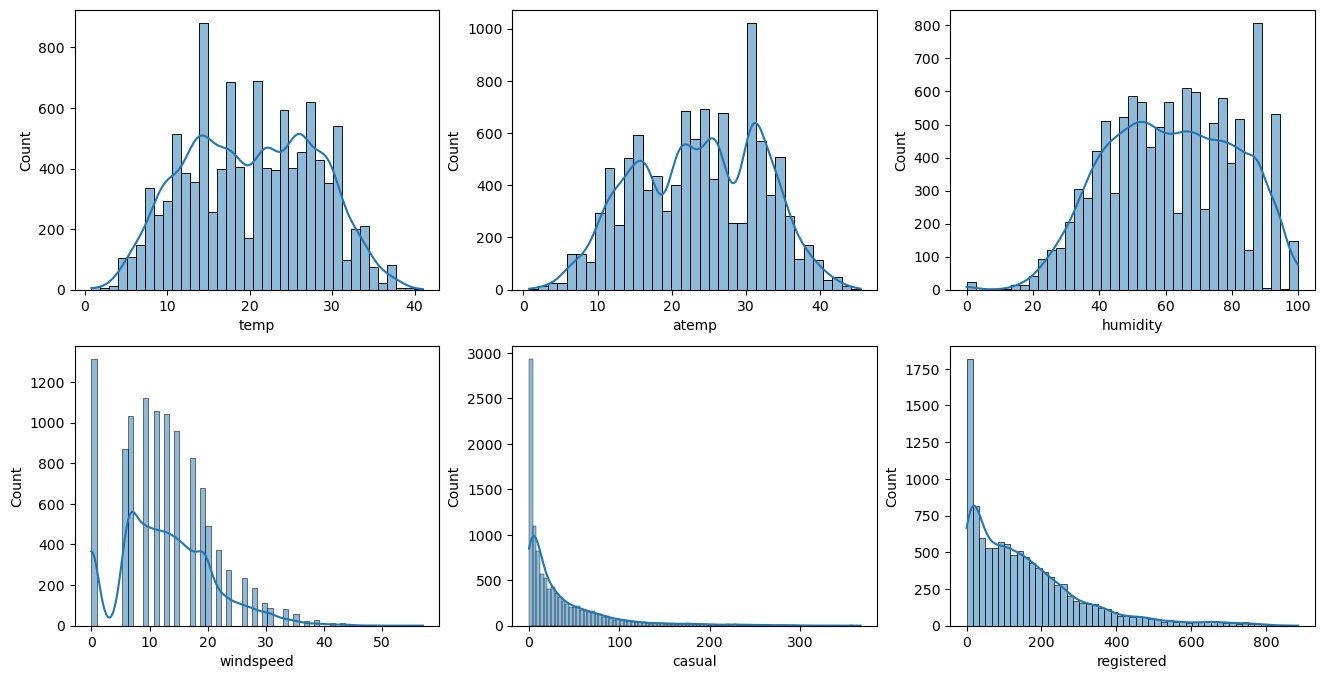

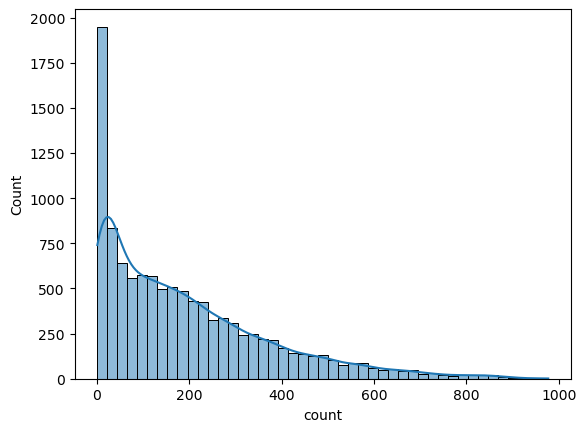

In [13]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

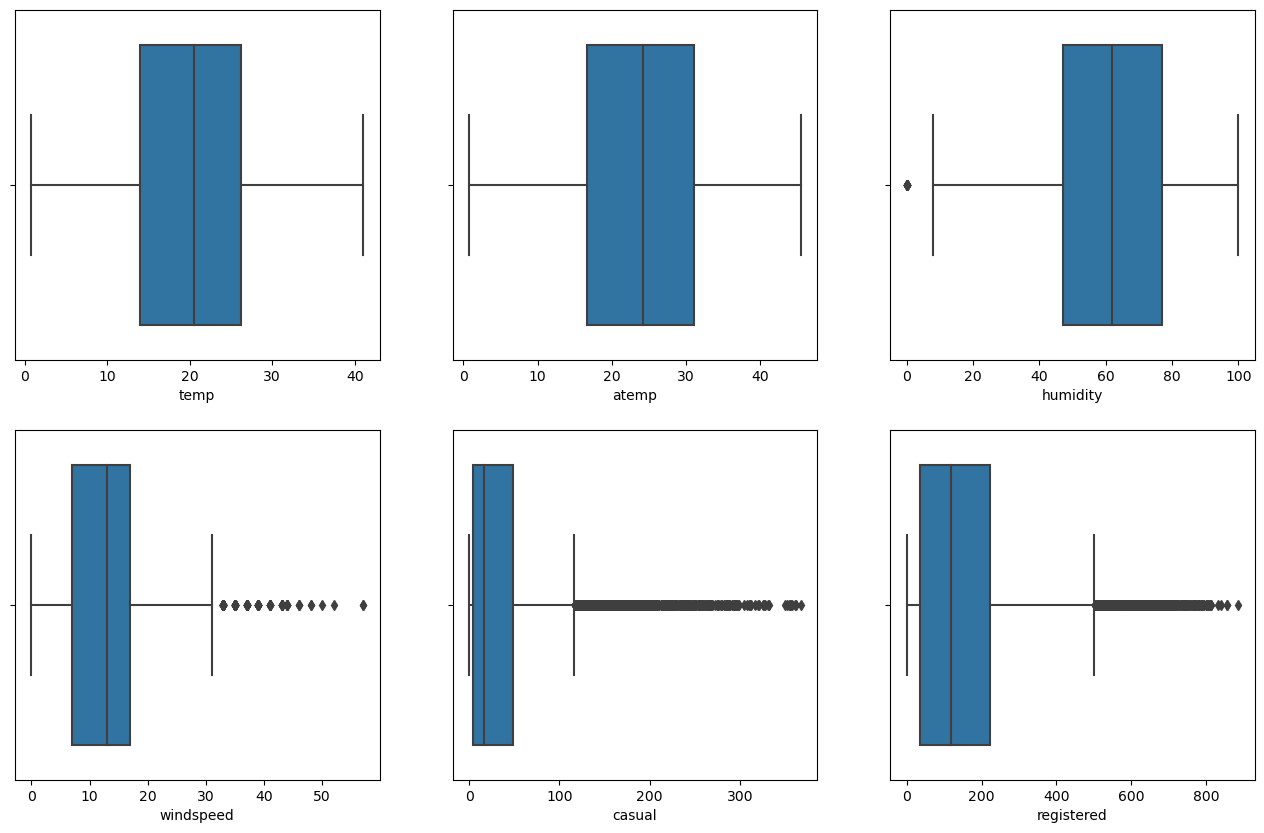

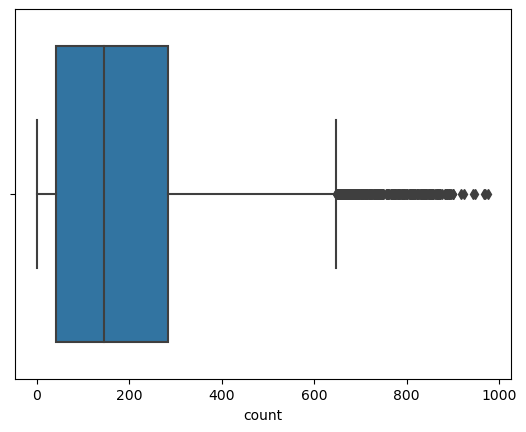

In [14]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

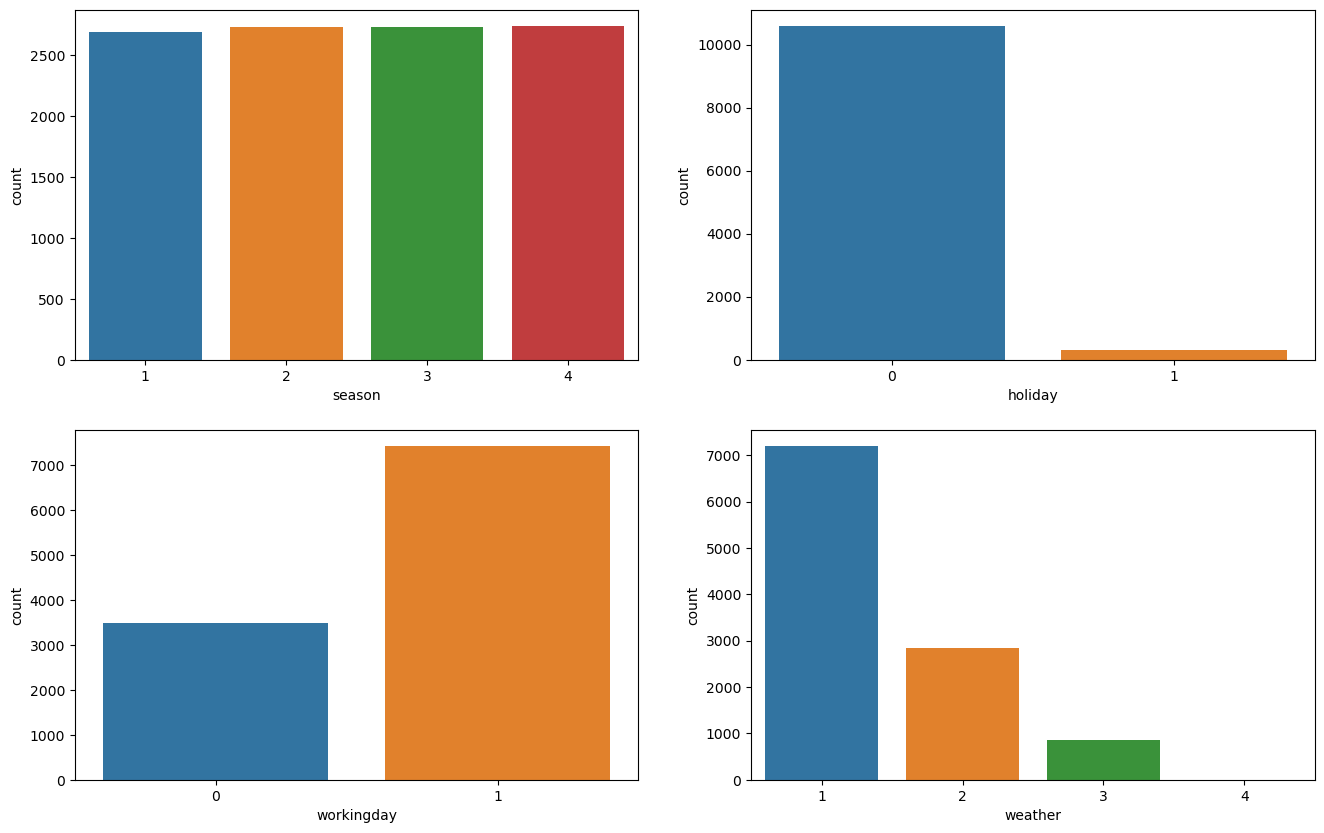

In [15]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

# Bi-variate Analysis

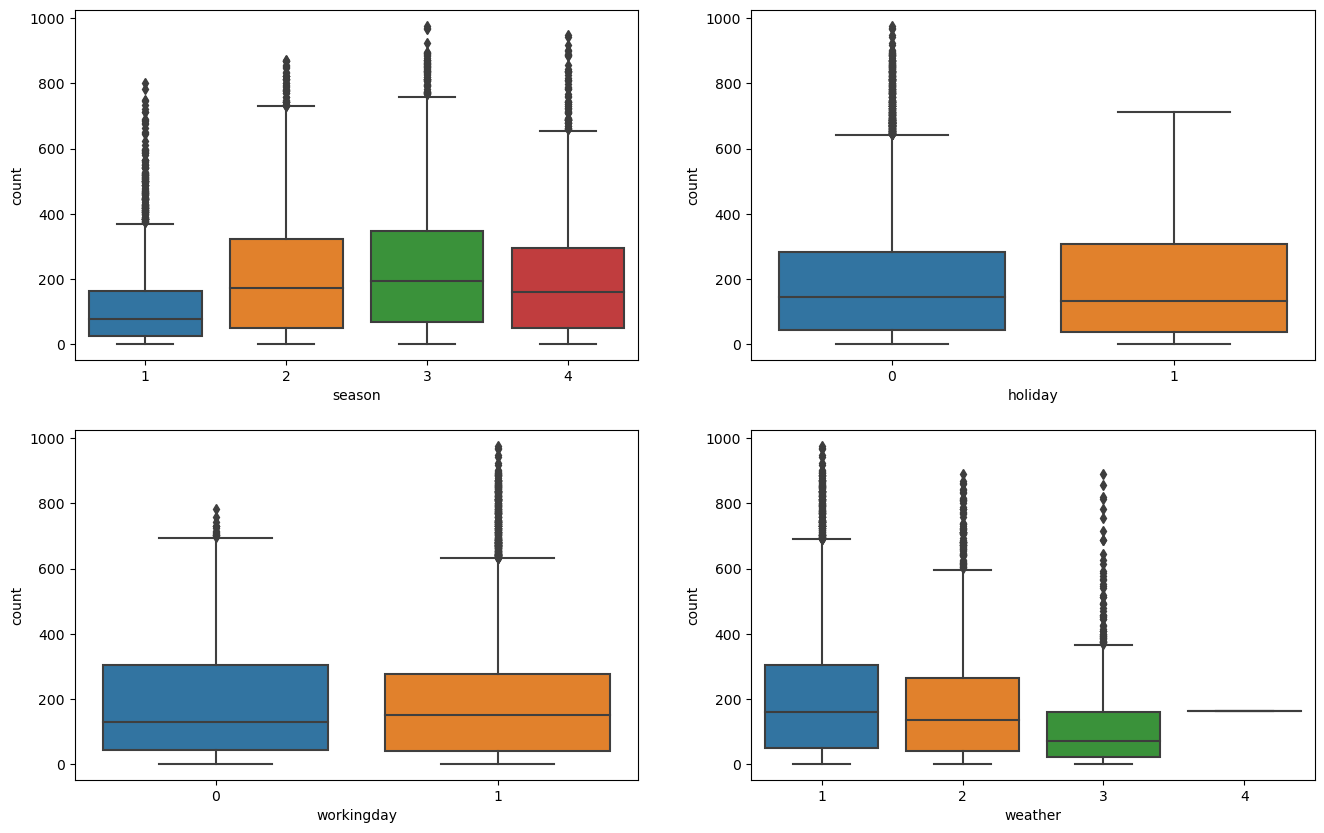

In [16]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

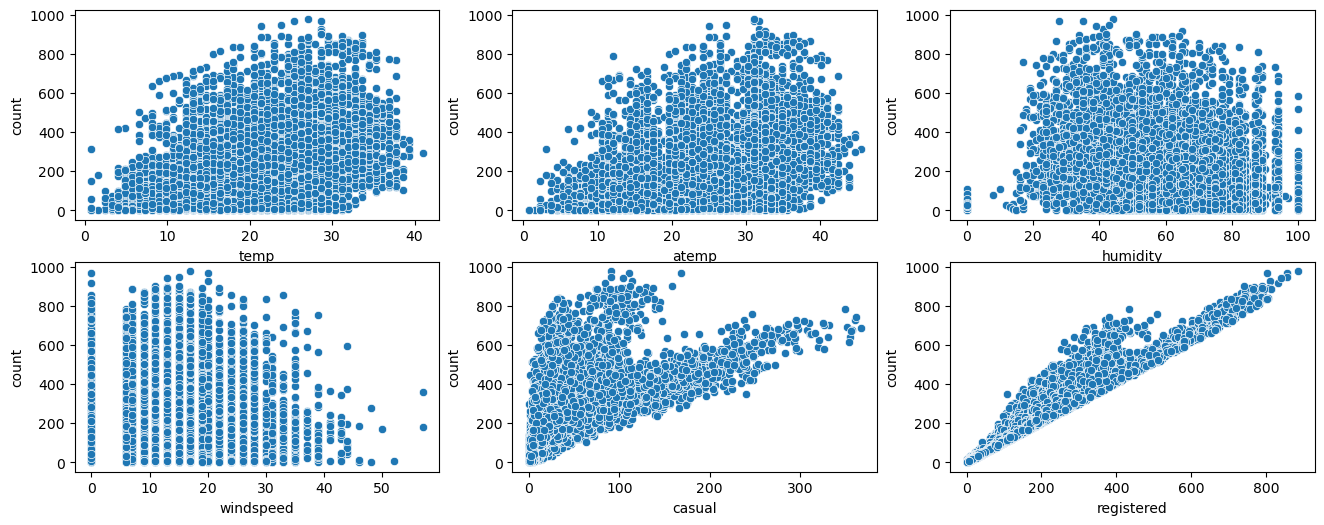

In [17]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5088\1652664204.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
C:\Users\DELL\AppData\Local\Temp\ipykernel_5088\1652664204.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


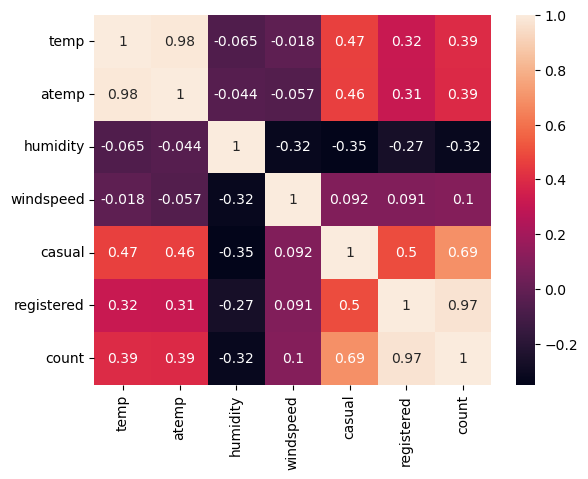

In [18]:
# understanding the correlation between count and numerical variables
df.corr()['count']
sns.heatmap(df.corr(), annot=True)
plt.show()

HYPOTHESIS TESTING


In [19]:
#Null Hypothesis (H0): Weather is independent of the season
#Alternate Hypothesis (H1): Weather is not independent of the season
#Significance level (alpha): 0.05

data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table
val = chi2_contingency(data_table)
print(val)
expected_values = val[3]
print(expected_values)
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

Observed values:
Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


In [20]:
#Null Hypothesis: Working day has no effect on the number of cycles being rented.
#Alternate Hypothesis: Working day has effect on the number of cycles being rented.
#Significance level (alpha): 0.05

#We will use the 2-Sample T-Test to test the hypothess defined above

data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less
than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [21]:
ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of
cycles being rented.

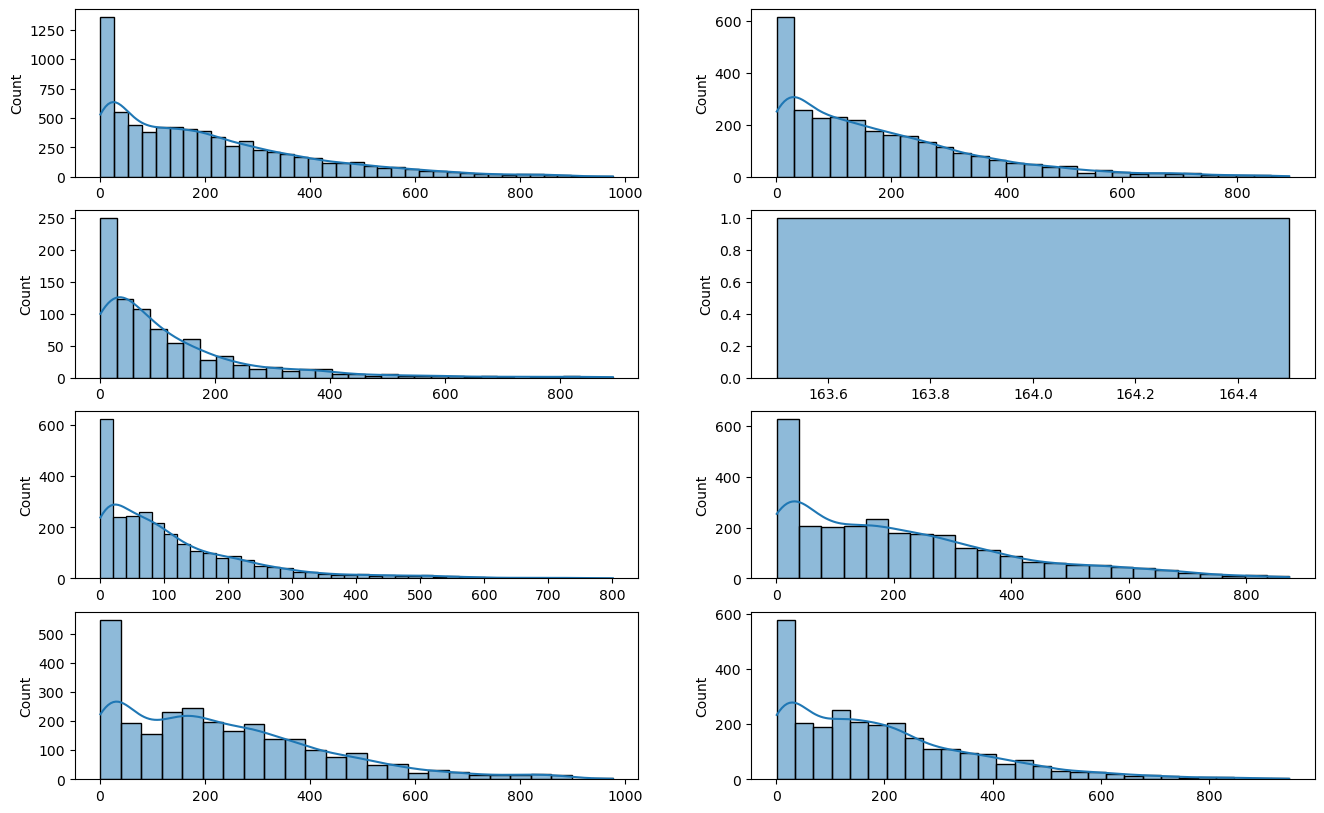

In [22]:
#Null Hypothesis: Number of cycles rented is similar in different weather and season.
#Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.
#Significance level (alpha): 0.05

# defining the data groups for the ANOVA
from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values


groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

# Assumptions of ANOVA

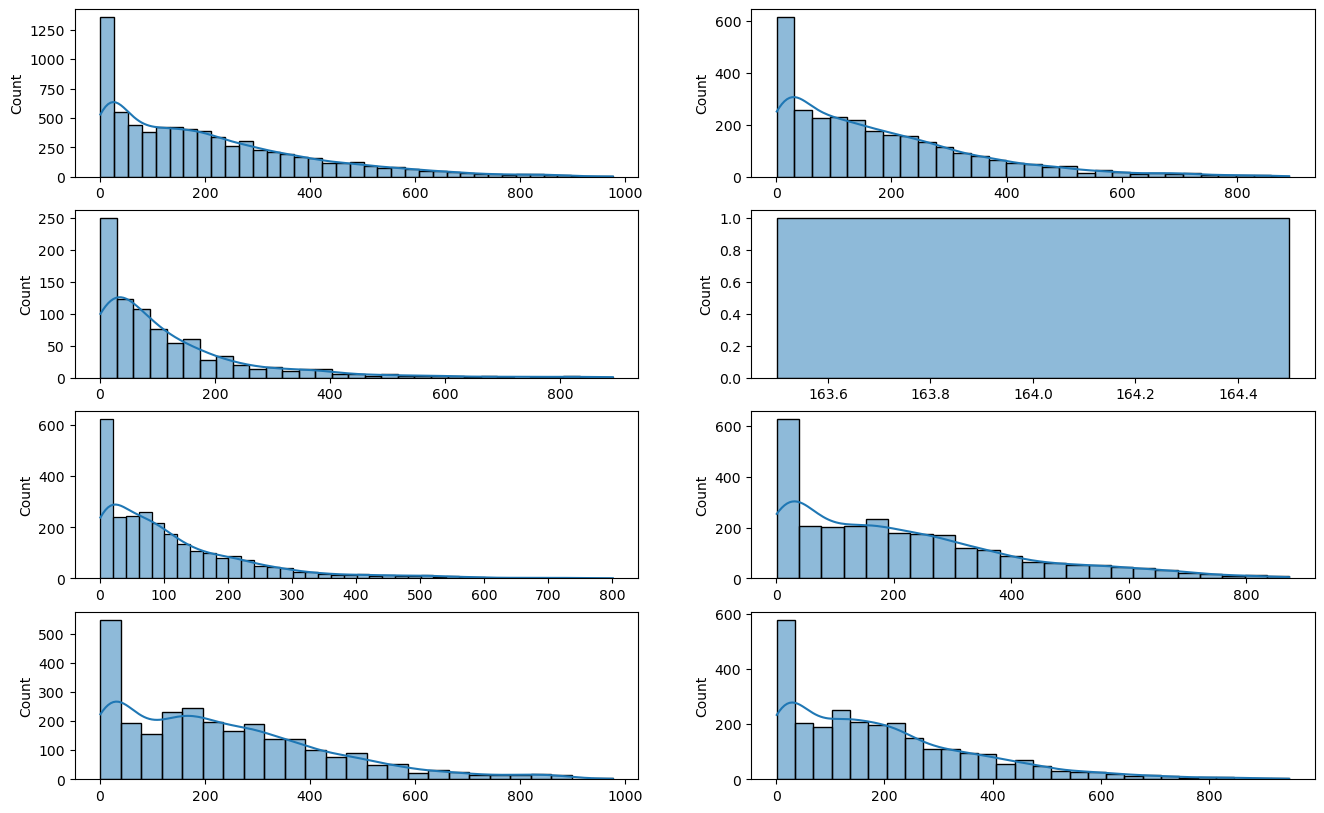

In [23]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

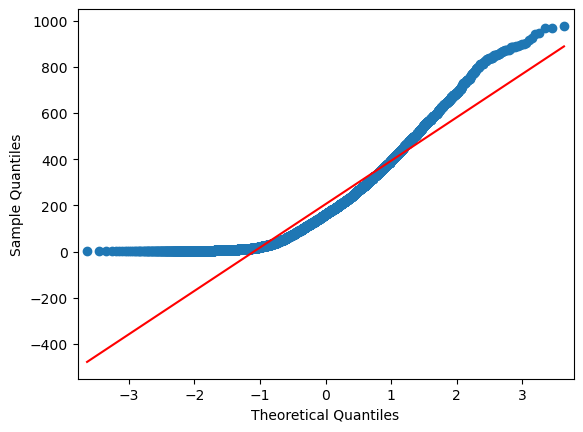

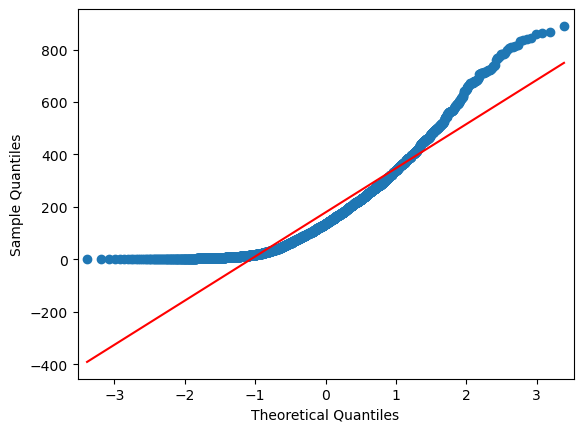

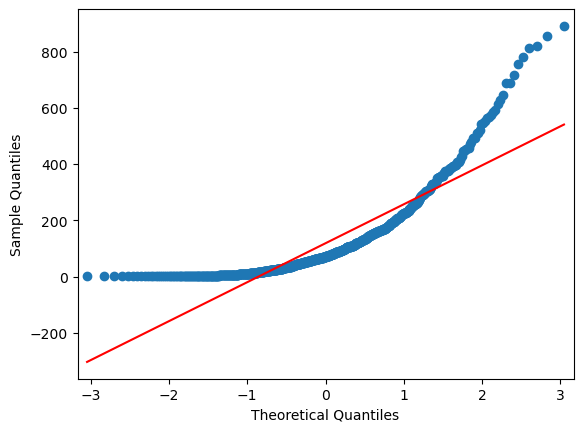

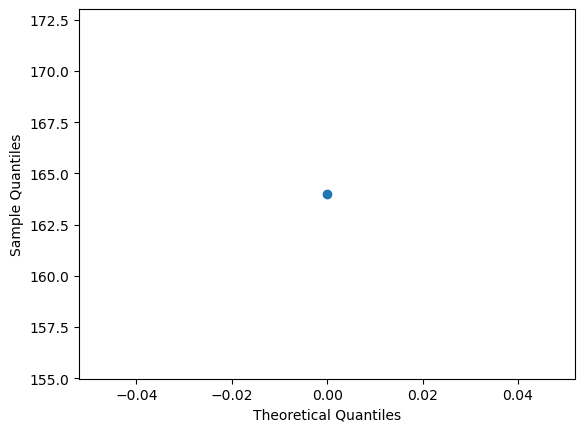

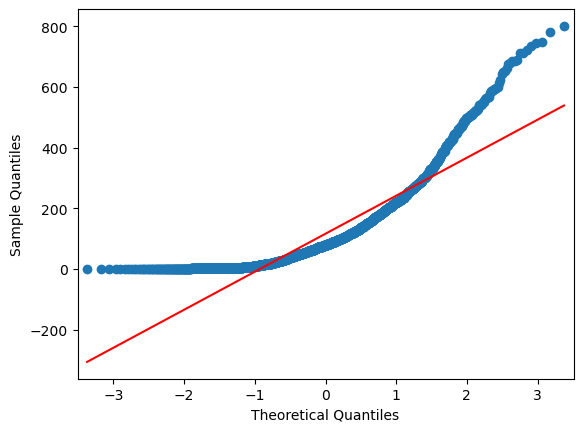

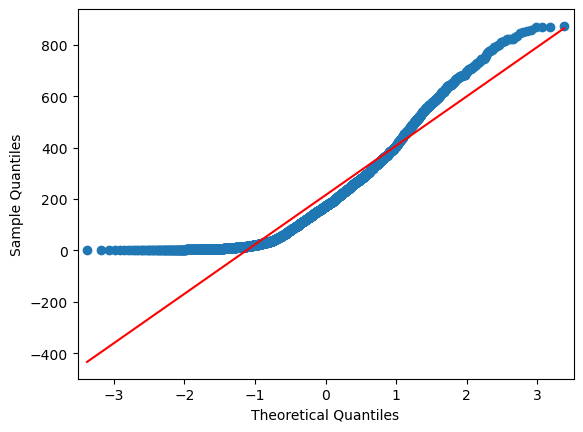

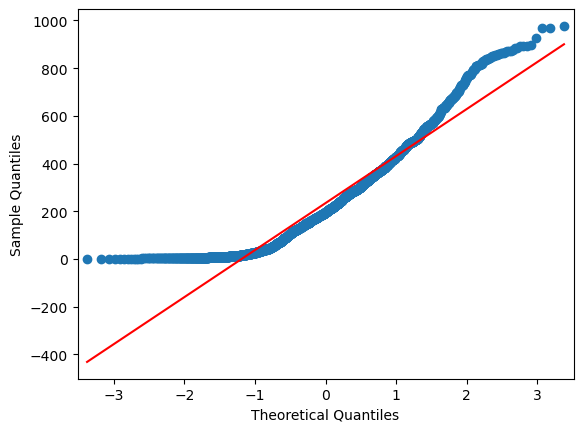

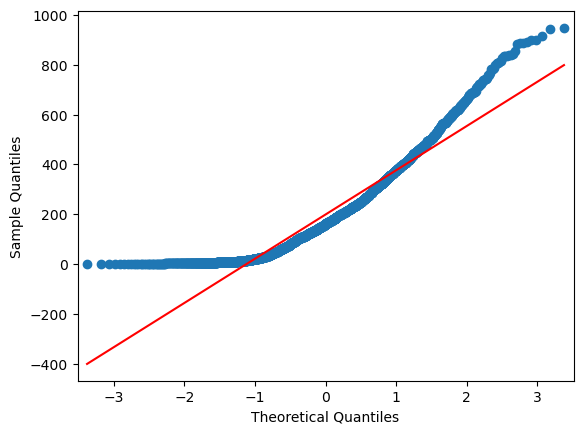

In [24]:
index = 0

for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()


As per above graphs, all groups are not following Gaussian distribution

In [25]:
#Null Hypothesis: Variances is similar in different weather and season.

#Alternate Hypothesis: Variances is not similar in different weather and season.

#Significance level (alpha): 0.05
levene_stat, p_value =levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print('p_value',p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are  equal")

p_value 3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


In [26]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal_stat, p_value =kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print("p_value =",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")

p_value = 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles
rented is not similar in different weather and season conditions

Insights:-

1.In summer and fall seasons more bikes are rented as compared to other seasons.

2.Whenever its a holiday more bikes are rented.

3.It is also clear from the workingday also that whenever day is holiday or weekend,slightly more bikes were rented.

4.Whenever there is rain, thunderstorm, snow or fog, there were less bikes wererented.

5.Whenever the humidity is less than 20, number of bikes rented is very very low.

6.Whenever the temperature is less than 10, number of bikes rented is less.

7.Whenever the windspeed is greater than 35, number of bikes rented is less.

Recommendations:-
    
1.In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.

2.With a significance level of 0.05, workingday has no effect on the number of bikes being rented.

3.In very low humid days, company should have less bikes in the stock to be rented.

4.Whenever temperature is less than 10 or in very cold days, company should have less bikes.

5.Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.